In [1]:
#fundamental tools for the game environment model
import numpy as np
from multiprocess import Process, Queue, Semaphore, Lock
import time

# for visualations
import matplotlib.pyplot as plt

In [2]:
from randomchooser import Chooser
from exploresims import simulate_explore, sim_1
import explore

pygame 2.5.1 (SDL 2.28.2, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
g = explore.ExploreGame()

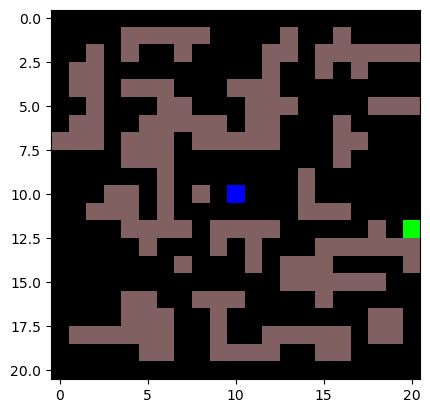

In [4]:
g.hard_reset()
g.draw()

In [5]:
choosers = []
choosers.append(Chooser(5))
if False:
    for i in range(3, 13):
        choosers.append(Chooser(5, [0,10,7.5,5,0], i))
    for i in range(3, 13):
        choosers.append(Chooser(5, [10,10,10,10,10], i))
    for i in range(3, 13):
        choosers.append(Chooser(5, [1,10,10,10,0], i))
else:
    choosers.append(Chooser(5, [0, 10, 7.5, 5, 0], 6))
    choosers.append(Chooser(5, [0, 10, 7.5, 5, 0], 4))
    choosers.append(Chooser(5, [0, 10, 7.5, 5, 0], 5))
    choosers.append(Chooser(5, [1, 10, 10, 10, 0], 7))
len(choosers)

5

In [6]:
out = sim_1(choosers, samples=100, games=10, num_process=8, num_column=3)

In [7]:
results = out

In [8]:
for k in range(len(results)):
    max_winrate = 0
    pos = 0
    for i in range(k, len(results)):
        if results[i][2][0] > max_winrate:
            max_winrate = results[i][2][0]
            pos = i
    temp = results[k]
    results[k] = results[pos]
    results[pos] = temp

In [9]:
for i in range(len(results)):
    print(results[i][2][0])

0.18
0.17
0.14
0.11
0.04


In [10]:
weights = []
durations = []
win_data = []
stdev_data = []
trace_averages = []
for result in results:
    weights.append(result[0])
    durations.append(result[1])
    win_data.append(result[2])
    stdev_data.append(result[3])
    trace_averages.append(result[4])

In [11]:
for (w, d, r) in zip(weights, durations, win_data):
    print(d, w, f"{r[0]:.4}", f"{r[2]:.3}", " <--> ", f"{r[0] - r[2]:.4}", " - ", f"{r[0] + r[2]:.4}")

6 [0, 10, 7.5, 5, 0] 0.18 0.0409  <-->  0.1391  -  0.2209
5 [0, 10, 7.5, 5, 0] 0.17 0.0448  <-->  0.1252  -  0.2148
7 [1, 10, 10, 10, 0] 0.14 0.0347  <-->  0.1053  -  0.1747
4 [0, 10, 7.5, 5, 0] 0.11 0.0313  <-->  0.07871  -  0.1413
-1 None 0.04 0.0196  <-->  0.0204  -  0.0596


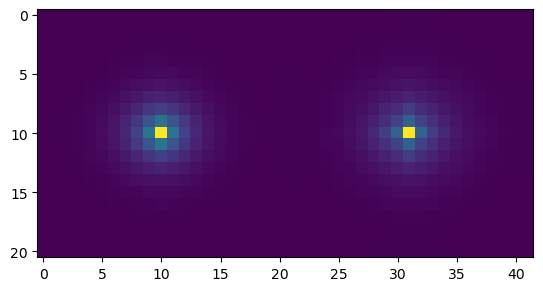

In [13]:
temp = np.hstack([trace_averages[-2], trace_averages[0]])
plt.imshow(temp)

In [43]:
mins = np.zeros(len(trace_averages))
for i in range(len(trace_averages)):
    mins[i] = trace_averages[i].min()
mins.mean()

1.4395645161290322

In [44]:
mins.std()

0.5024933281844916

In [38]:
trace_averages[-1].max()

524.6467

In [39]:
trace_averages[0].max()

489.7545

In [ ]:
#6 [0, 10, 7.5, 5, 0] 7.37 0.0274  <-->  7.343  -  7.398
#4 [0, 10, 7.5, 5, 0] 7.354 0.0276  <-->  7.326  -  7.381
#5 [0, 10, 7.5, 5, 0] 7.318 0.0275  <-->  7.291  -  7.346
#7 [1, 10, 10, 10, 0] 7.31 0.0277  <-->  7.282  -  7.337

In [10]:
win_averages = []
win_stds = []
win_errors = []
for win in win_data:
    win_averages.append(win[0])
    win_stds.append(win[1])
    win_errors.append(win[2])

In [11]:
stdev_averages = []
stdev_stds = []
stdev_errors = []
for stdev in stdev_data:
    stdev_averages.append(stdev[0])
    stdev_stds.append(stdev[1])
    stdev_errors.append(stdev[2])

In [12]:
for (mean, error) in zip(stdev_averages, stdev_errors):
    print(mean, error)

21.915006421778063 0.10708246384246096
15.2103472534303 0.08477570267273185
16.418986514123485 0.08330403448770658
17.957885942316455 0.082570717415026
19.480932797157642 0.08758232776463426
21.781383165100706 0.09574792182765507
15.629925028396283 0.08976795817382
13.687060319755307 0.06589713849537174
14.736647638912821 0.08364109341070006
14.072948662005137 0.08261498998746902
13.682836146118154 0.09185016762984498
14.127084552989043 0.08014547039543578


In [3]:
ch1 = Chooser(5)
ch2 = Chooser(5, [1,10,10,10,1])

In [5]:
lol1 = Process(target=simulate_explore, args=[sem, out_lock, output_queue, 100,100,40, ch1, 15, 1.08])
lol2 = Process(target=simulate_explore, args=[sem, out_lock, output_queue, 100,100,40, ch2, 15, 1.08])

In [6]:
lol1.start()
lol2.start()

In [8]:
lol1.join()
lol2.join()

In [10]:
list = []
if list:
    print("hi")